This is the one sample I have that shows a TMR signal. The leads are made of sputtered cobalt. All of the dots were designed to be 300nm in length. 

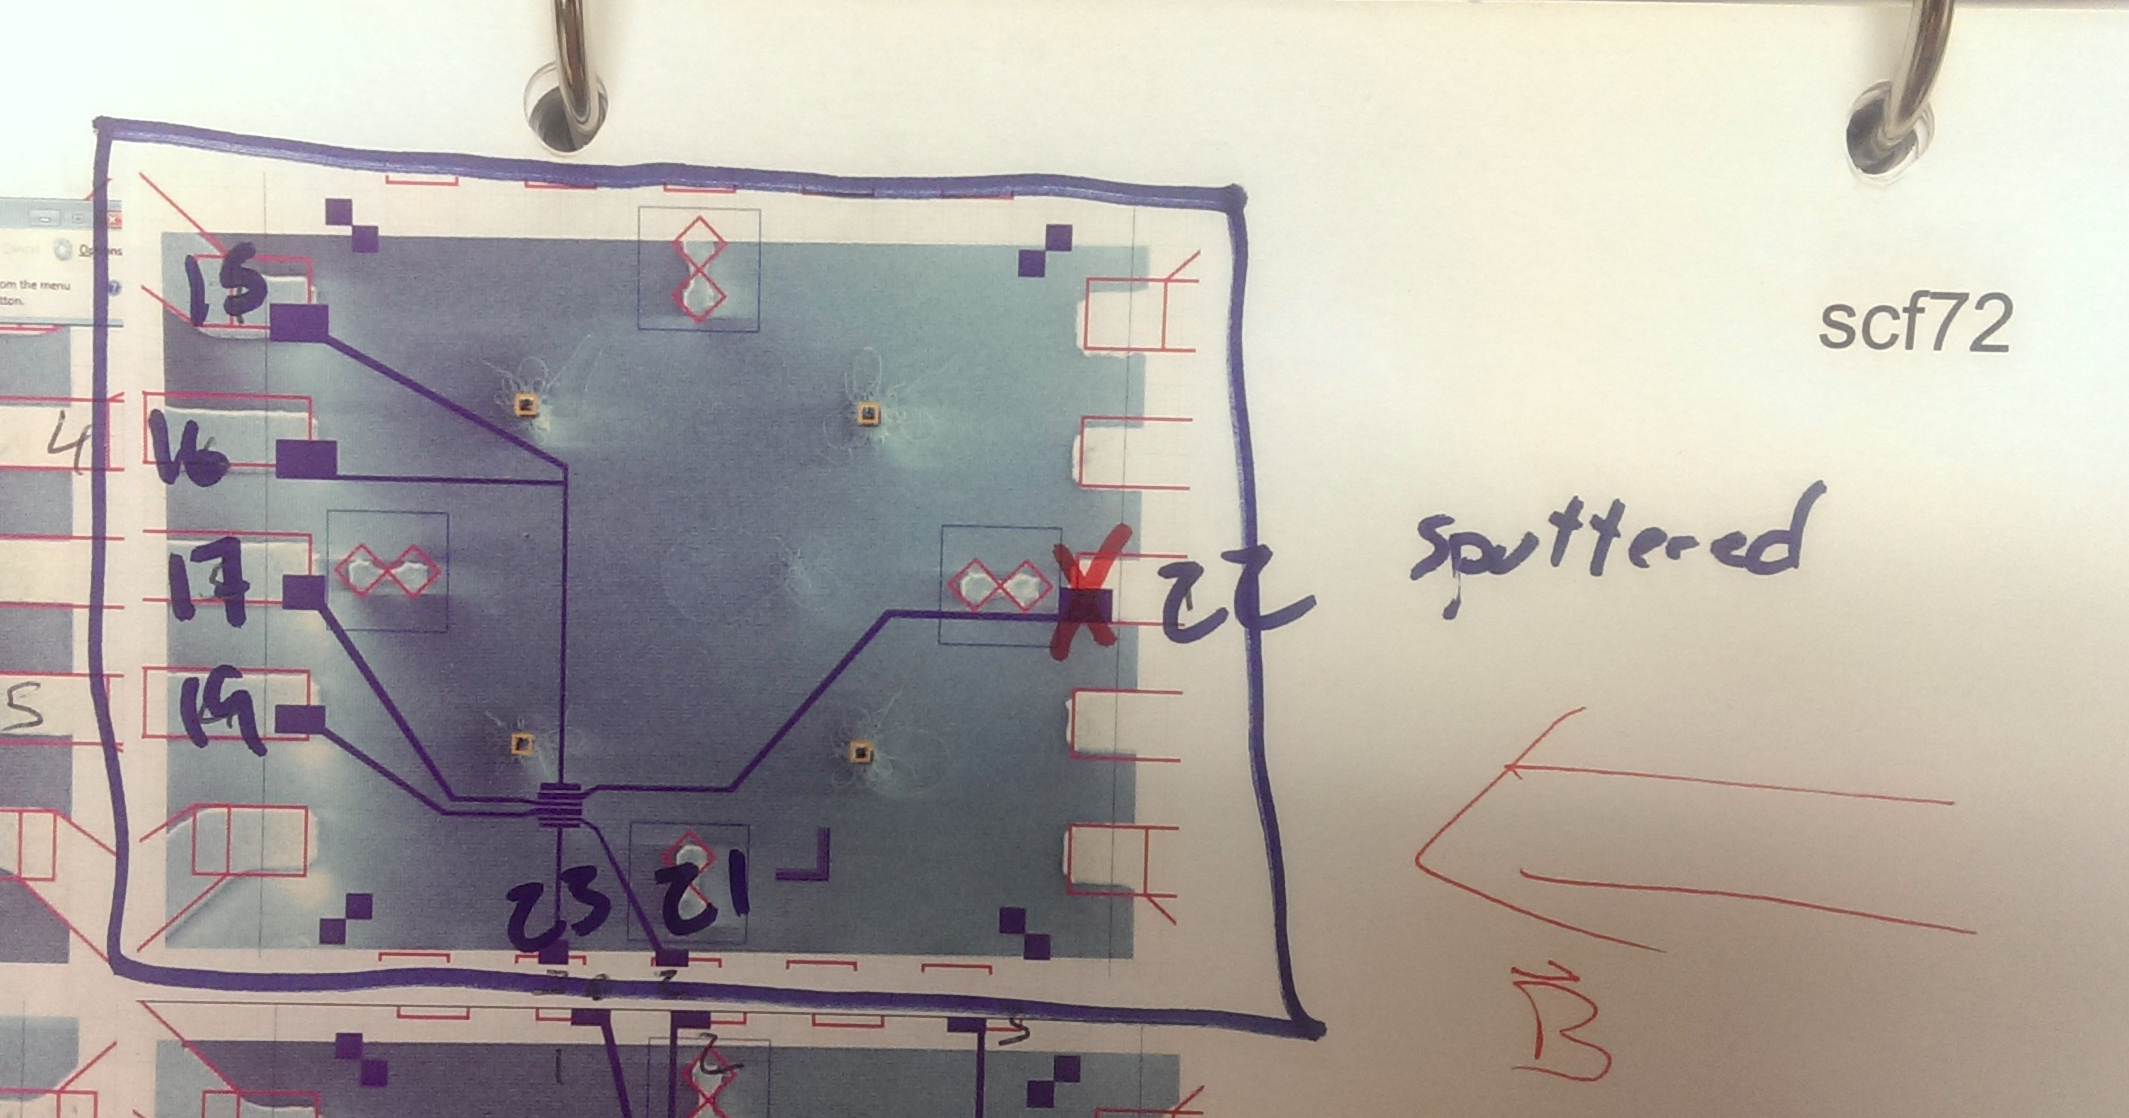

In [60]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Repos/notebooks/thesisrc.py')
mpl.rcParams['figure.figsize'] = (8.0, 6.0)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt
import os
from IPython.display import Image 

working_dir =  '/Users/nik/Data/FM_CNT_selection_rules/'
data_dir = os.path.join(working_dir,'data/SCF72')
fig_dir = os.path.join(data_dir, 'figures')
Image(filename=os.path.join(fig_dir,'scf72_q1.png'), width=800, height=600)

## Room Temperature Data

The leads being measured are labelled 17 and 19 in the image. The two probe resistance at room temperature was $R = 65k\Omega$. A measurement on a different pair of leads shows that this nanotube is semiconducting.

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


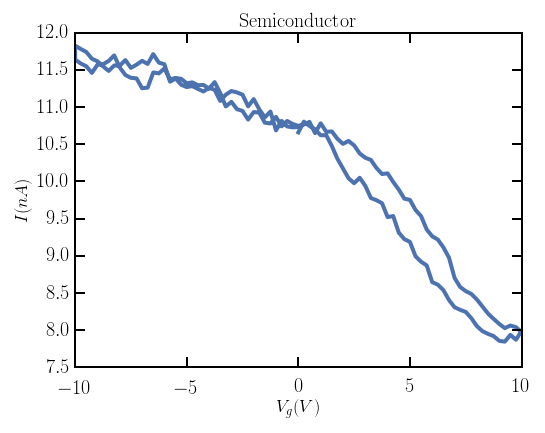

In [9]:
# proof that the nanotube is semiconducting
# measured between contacts 15 and 23, the whole length of the tube used for the device

f = os.path.join(data_dir, 'room_temp/gate-swp_15-23_13_a.bin')
data = np.fromfile(f, '>d')
data = data.reshape((-1, data[0]))
gate = data[:,1]
current = data [:,2]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gate, current*1e9)
ax.set_title('Semiconductor')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
# ax.text(5.0, 11.5, r'$V_b = 5mV$')

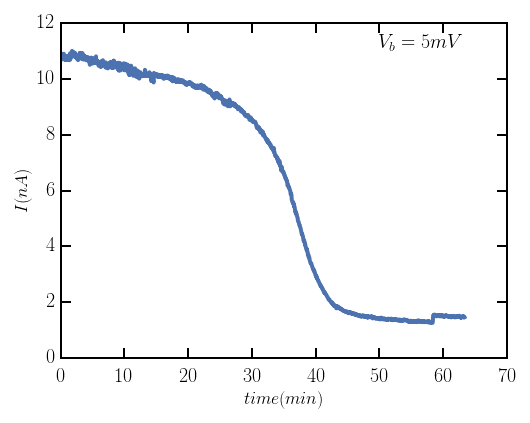

In [10]:
# cool down data from leads 15-23

f = os.path.join(data_dir, 'room_temp/cool-down_15-23_13_a.bin')
df = lvdt.get_data_2d(f)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['t0']/60.0, df['Iavg']*1e9)
ax.set_xlabel(r'$time (min)$')
ax.set_ylabel(r'$I (nA)$')
ax.text(50.0, 11., r'$V_b = 5mV$')

No temperature scale makes that data pretty worthless. I must not have had a sensor connected. It's 300K on the left and 4K on the right. 

## 4K Data -- 17-19

This sample was cooled down in the dunker. At this point, so few samples worked that I stopped bothering to load cryostats.

Data was taken on leads 21-23 and 17-19. 21-23 shows some Coulomb Diamonds, but one of those leads blew up before I got a chance to turn on the field. If I remember right, it blew up in an unfortunate incident involving a faulty 15V power supply.

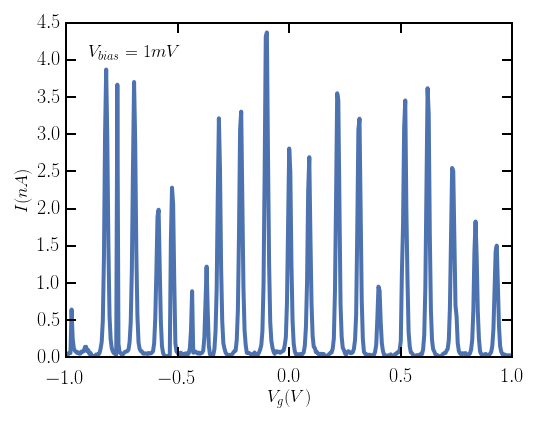

In [24]:
# gate behavior

f = os.path.join(data_dir,'4K/gate-swp_17-29_13_b.bin')
df = lvdt.get_data_2d(f)
df['Iavg'] = df['Iavg']*1e9 + 0.6 # correct offset

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(df.Gate[200:602],df.Iavg[200:602])
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
# ax.set_title('gate-swp_17-29_13_b'+'_one')
ax.text(-0.9,4.0,r'$V_{bias}=1mV$', fontsize=18)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


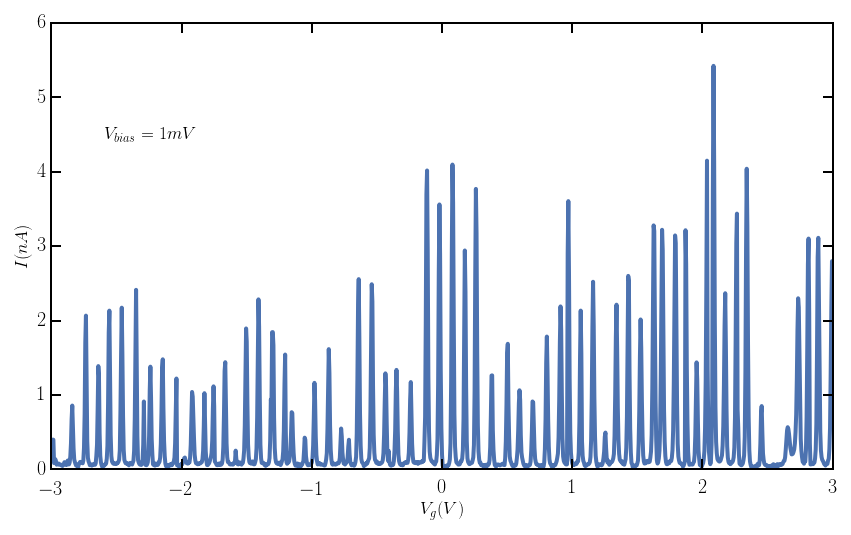

In [25]:
# more of the gate behavior
# plot the upsweep only

data = np.fromfile(f,'>d')
data_two = data[4818:]
data_two = data_two.reshape((-1,data_two[0]))
data_two = data_two.byteswap().newbyteorder()
columns = ['Size','Gate','Iavg','Istd','t0','dt']
columns.extend(['I'+str(x) for x in range(int(data_two[0,0]-6))])
df_two = pd.DataFrame(data_two, columns=columns)

df_two['dir'] = (df_two['Gate']-df_two['Gate'].shift()).fillna(0)
df_plt = df_two[df_two['dir']>0].sort('Gate', inplace=False) # look here to change up/down sweep

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.plot(df_plt['Gate'], df_plt['Iavg']*1e9+0.6)
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.text(-2.6,4.4,r'$V_{bias}=1mV$', fontsize=18)

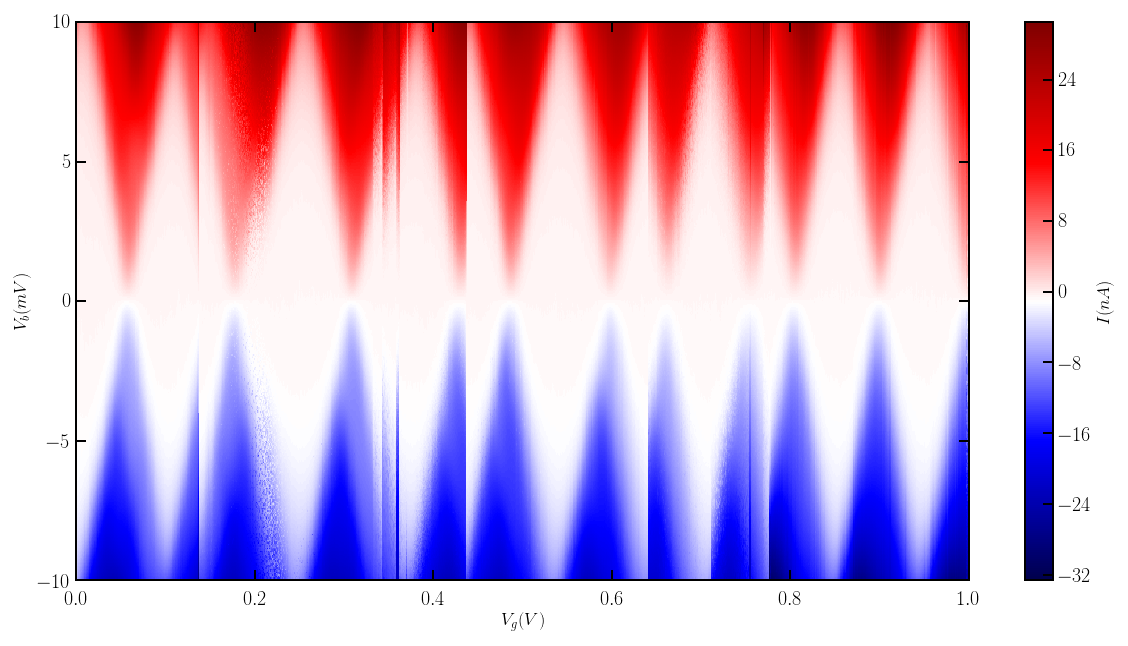

In [50]:
# diamonds at 0T
# this was taken before the field was turned on
# the leads could be in any random configuration
# that's bad news for this story

f = os.path.join(data_dir,'4K/VI-gate_17-19_13_f.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[0], df.columns[-1],df.index[0],df.index[-1]]
im = ax.imshow(df*1e9+0.0, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

In [27]:
def get_dIdV(df, dV):
    return pd.DataFrame(np.gradient(df,dV)[0], index = df.index, columns = df.columns)

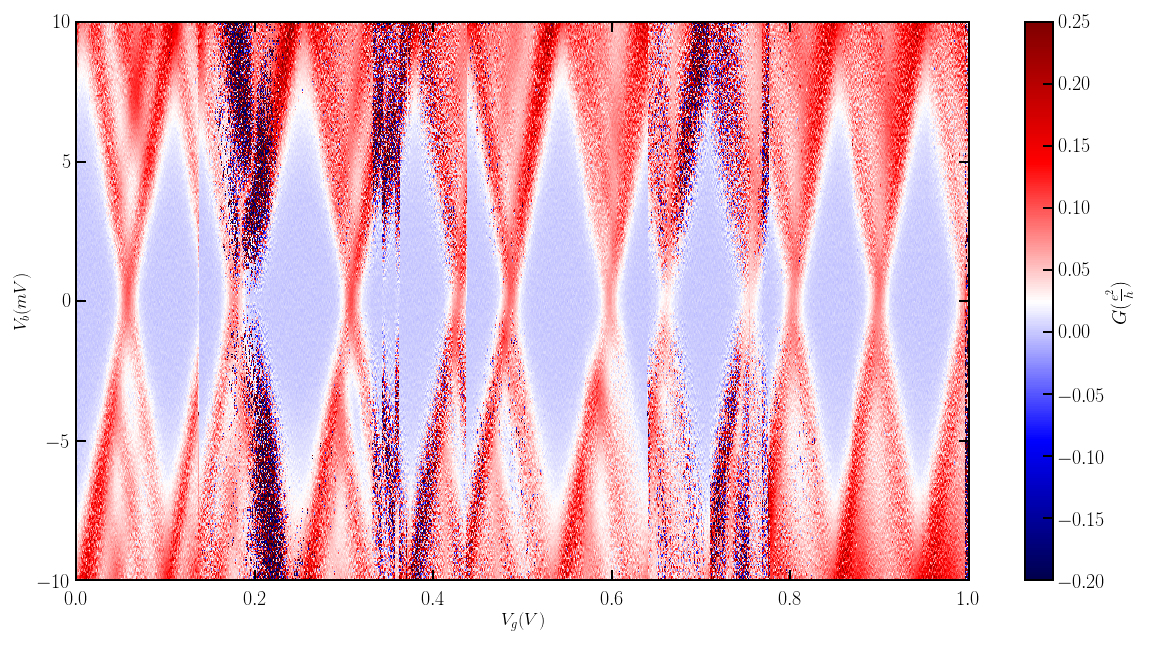

In [30]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
cond = get_dIdV(df,50e-6)/3.874e-5
limits = [cond.columns[0], cond.columns[-1],cond.index[0],cond.index[-1]]
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.25, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# ax.set_title('B=0T')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$', fontsize=20)

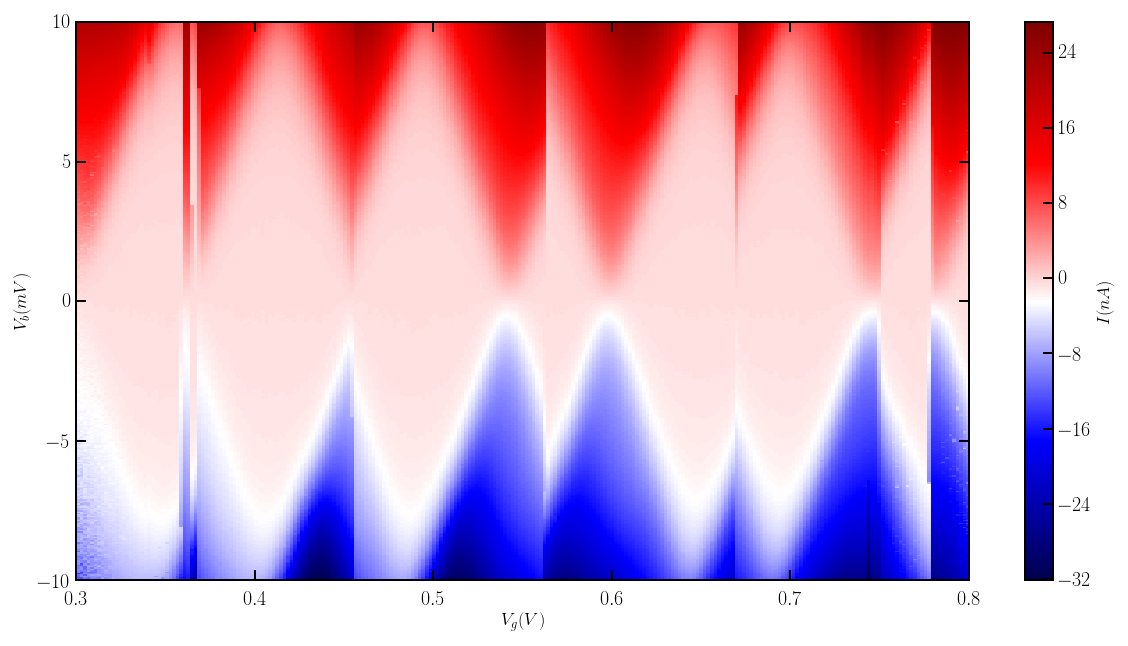

In [32]:
# a second scan in the same region

f = os.path.join(data_dir,'4K/VI-gate_17-19_13_g.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[0], df.columns[-1],df.index[0],df.index[-1]]
im = ax.imshow(df*1e9+0.0, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

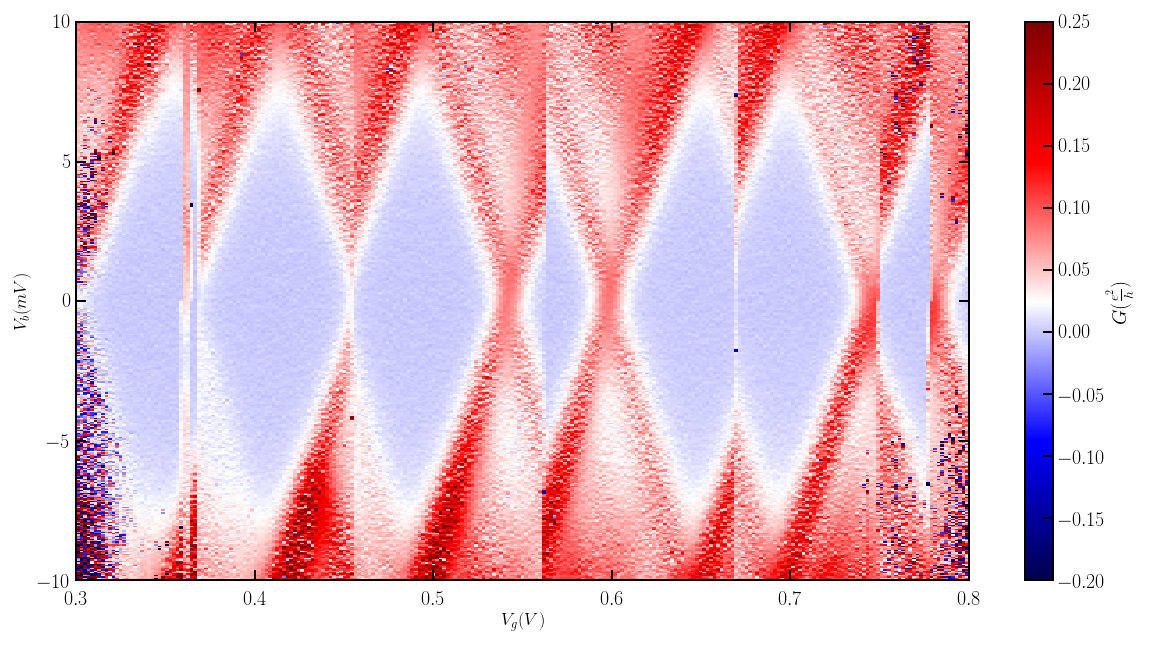

In [33]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
cond = get_dIdV(df,50e-6)/3.874e-5
limits = [cond.columns[0], cond.columns[-1],cond.index[0],cond.index[-1]]
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.25, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# ax.set_title('B=0T')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$', fontsize=20)

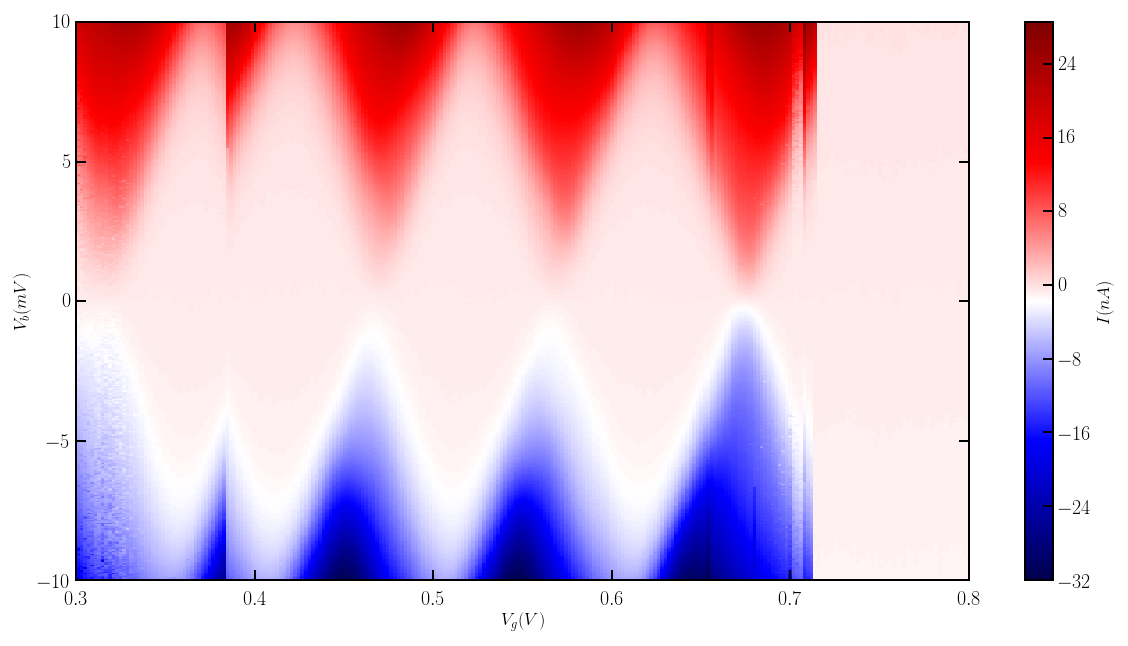

In [35]:
# diamonds at -4T

f = os.path.join(data_dir,'4K/VI-gate_17-19_13_g_n4T.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[0], df.columns[-1],df.index[0],df.index[-1]]
im = ax.imshow(df*1e9+0.0, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

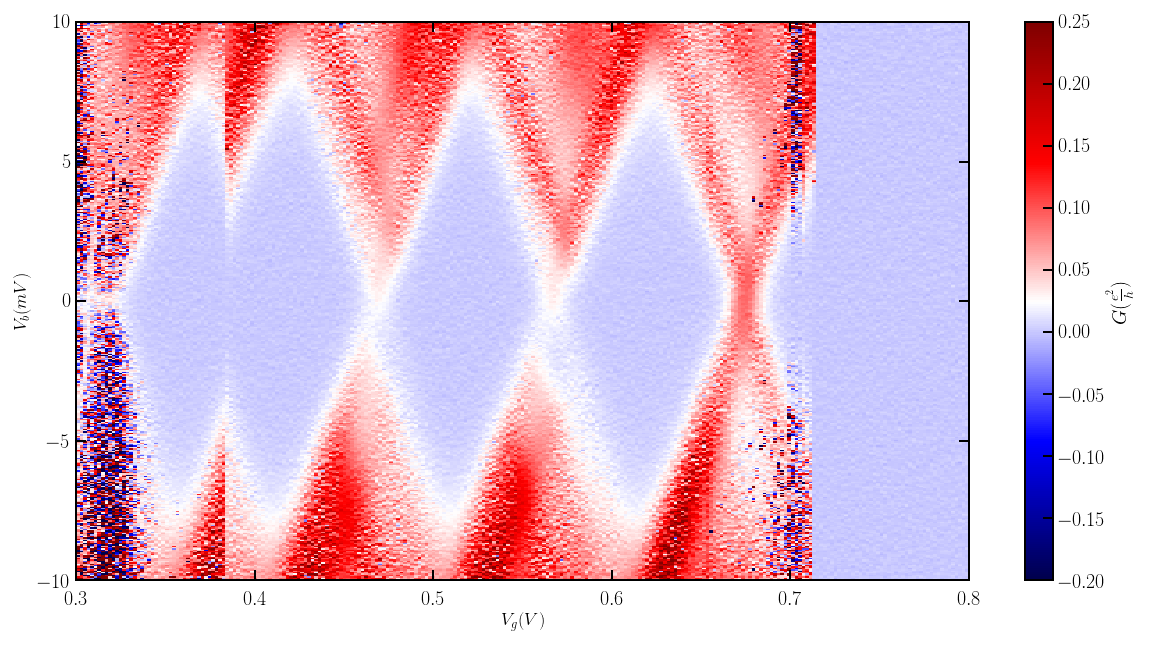

In [36]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
cond = get_dIdV(df,50e-6)/3.874e-5
limits = [cond.columns[0], cond.columns[-1],cond.index[0],cond.index[-1]]
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.25, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# ax.set_title('B=0T')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$', fontsize=20)

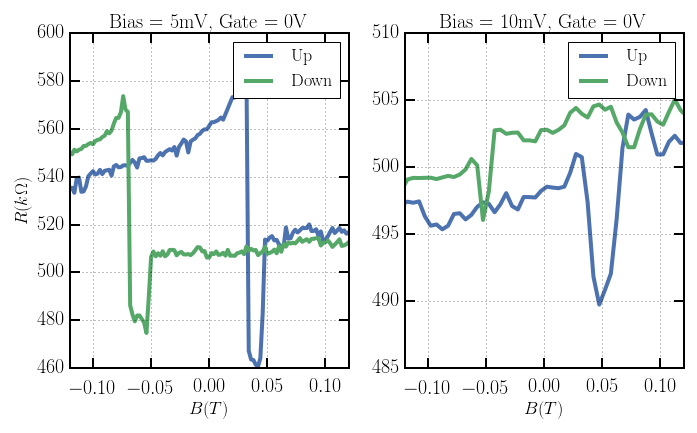

In [58]:
# two measurements of TMR signal at 0 gate voltage

fd = os.path.join(data_dir, '4K/BI_17-19_13_d.bin')
fe = os.path.join(data_dir, '4K/BI_17-19_13_e.bin')
fi = os.path.join(data_dir, '4K/BI_17-19_13_i.bin')

def get_bias_gate(header):
    bias = 0.0
    gate = 0.0
    for i,line in enumerate(header):
        if line[0] == 'Bias Output Options':
            bias = float(header[i+5][1])
        if line[0] == 'Gate Output Options':
            gate = float(header[i+5][1])
    return bias, gate

f = os.path.join(data_dir, '4K/BI_17-19_13_e.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
ind = lvdt.split_sweeps(df, 'Field')

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (11,6), sharey=False)

ax1.plot(df['Field'][0:501], bias/df['Iavg'][0:501]/1000, label='Up')
ax1.plot(df['Field'][501:1002], bias/df['Iavg'][501:1002]/1000, label='Down')
ax1.set_xlabel(r'$B (T)$')
ax1.set_ylabel(r'$R (k\Omega)$')
ax1.set_title('Bias = 5mV, Gate = 0V')
ax1.set_xlim(-0.12, 0.12)
ax1.legend()
ax1.grid()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.02))

f = os.path.join(data_dir, '4K/BI_17-19_13_i.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df, 2)
ind = lvdt.split_sweeps(df, 'Field')

ax2.plot(df['Field'][0:601], bias/df['Iavg'][0:601]/1000, label='Up')
ax2.plot(df['Field'][601:1202], bias/df['Iavg'][601:1202]/1000, label='Down')
ax2.set_xlim(-0.12, 0.12)
ax2.set_xlabel(r'$B (T)$')
ax2.set_title('Bias = 10mV, Gate = 0V')
ax2.legend()
ax2.grid()

There is not data taken of the TMR signal as a function of gate. Only a few sweeps at fixed bias. These are the only two that show any clear signal.

17 is more narrow than 19. Based on these two plots, the coersive fields are 40mT (19) and 60mT(17). The TMR signal is -0.8 to -6.0%. 

### Analysis

There isn't a ton of data from this device, but there was some interesting behavior observed in the coulomb diamonds at 0T and -4T. Let's take a more careful look at the CD data at 0T and -4T. 

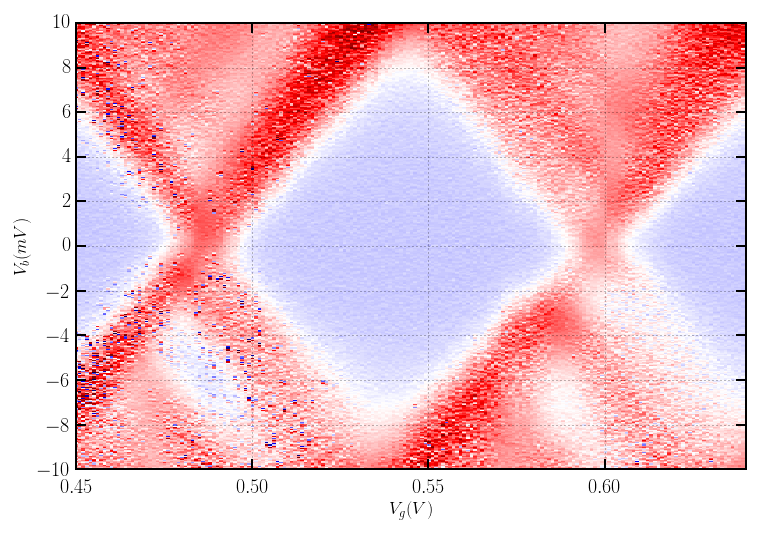

In [65]:
# 0T Data

f = os.path.join(data_dir,'4K/VI-gate_17-19_13_f.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
cond = get_dIdV(df, 50e-6)/3.875e-5

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.25, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# cb = plt.colorbar(im)
# cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

ax.set_xlim(0.45, 0.64)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.grid()

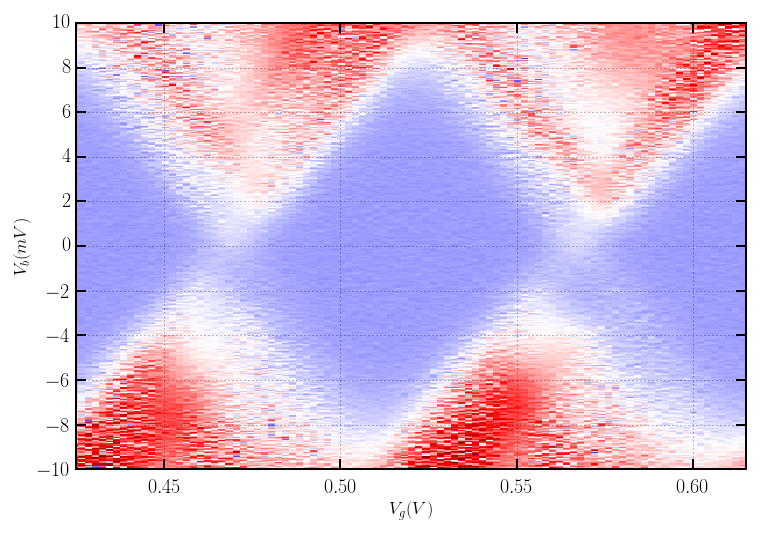

In [61]:
# -4T Data

f = os.path.join(data_dir,'4K/VI-gate_17-19_13_g_n4T.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
cond = get_dIdV(df, 50e-6)/3.875e-5

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.25, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# cb = plt.colorbar(im)
# cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

ax.set_xlim(0.425, 0.615)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.grid()

Now here are the same two plots with some guides to the eye illustrating which levels have moved in applied field.

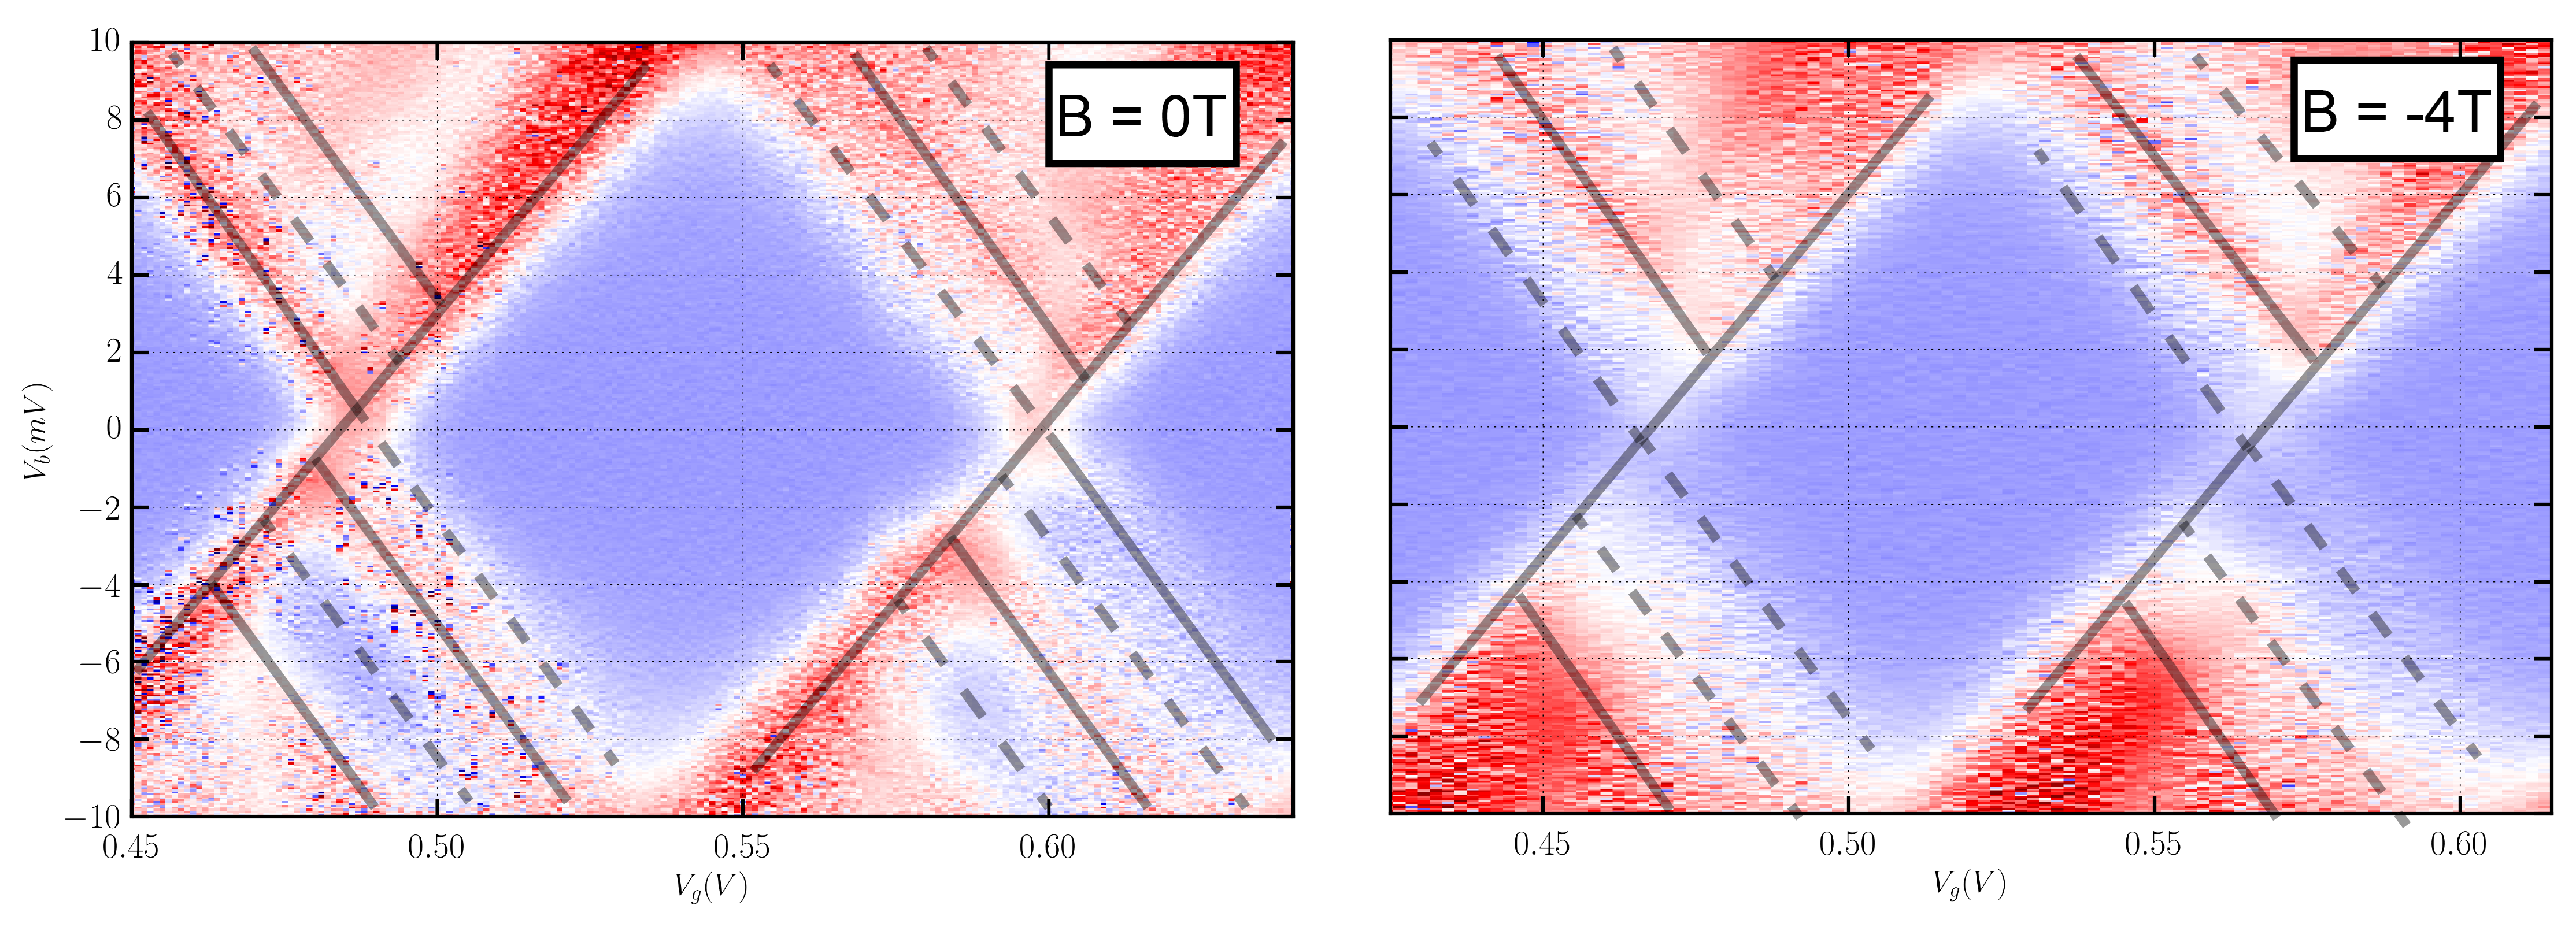

In [79]:
Image(filename=os.path.join(working_dir,'figures/scf72_side-by-side_CD.png'), width=800)

And now a sketch of all of the relevant quantum dot levels in those images.

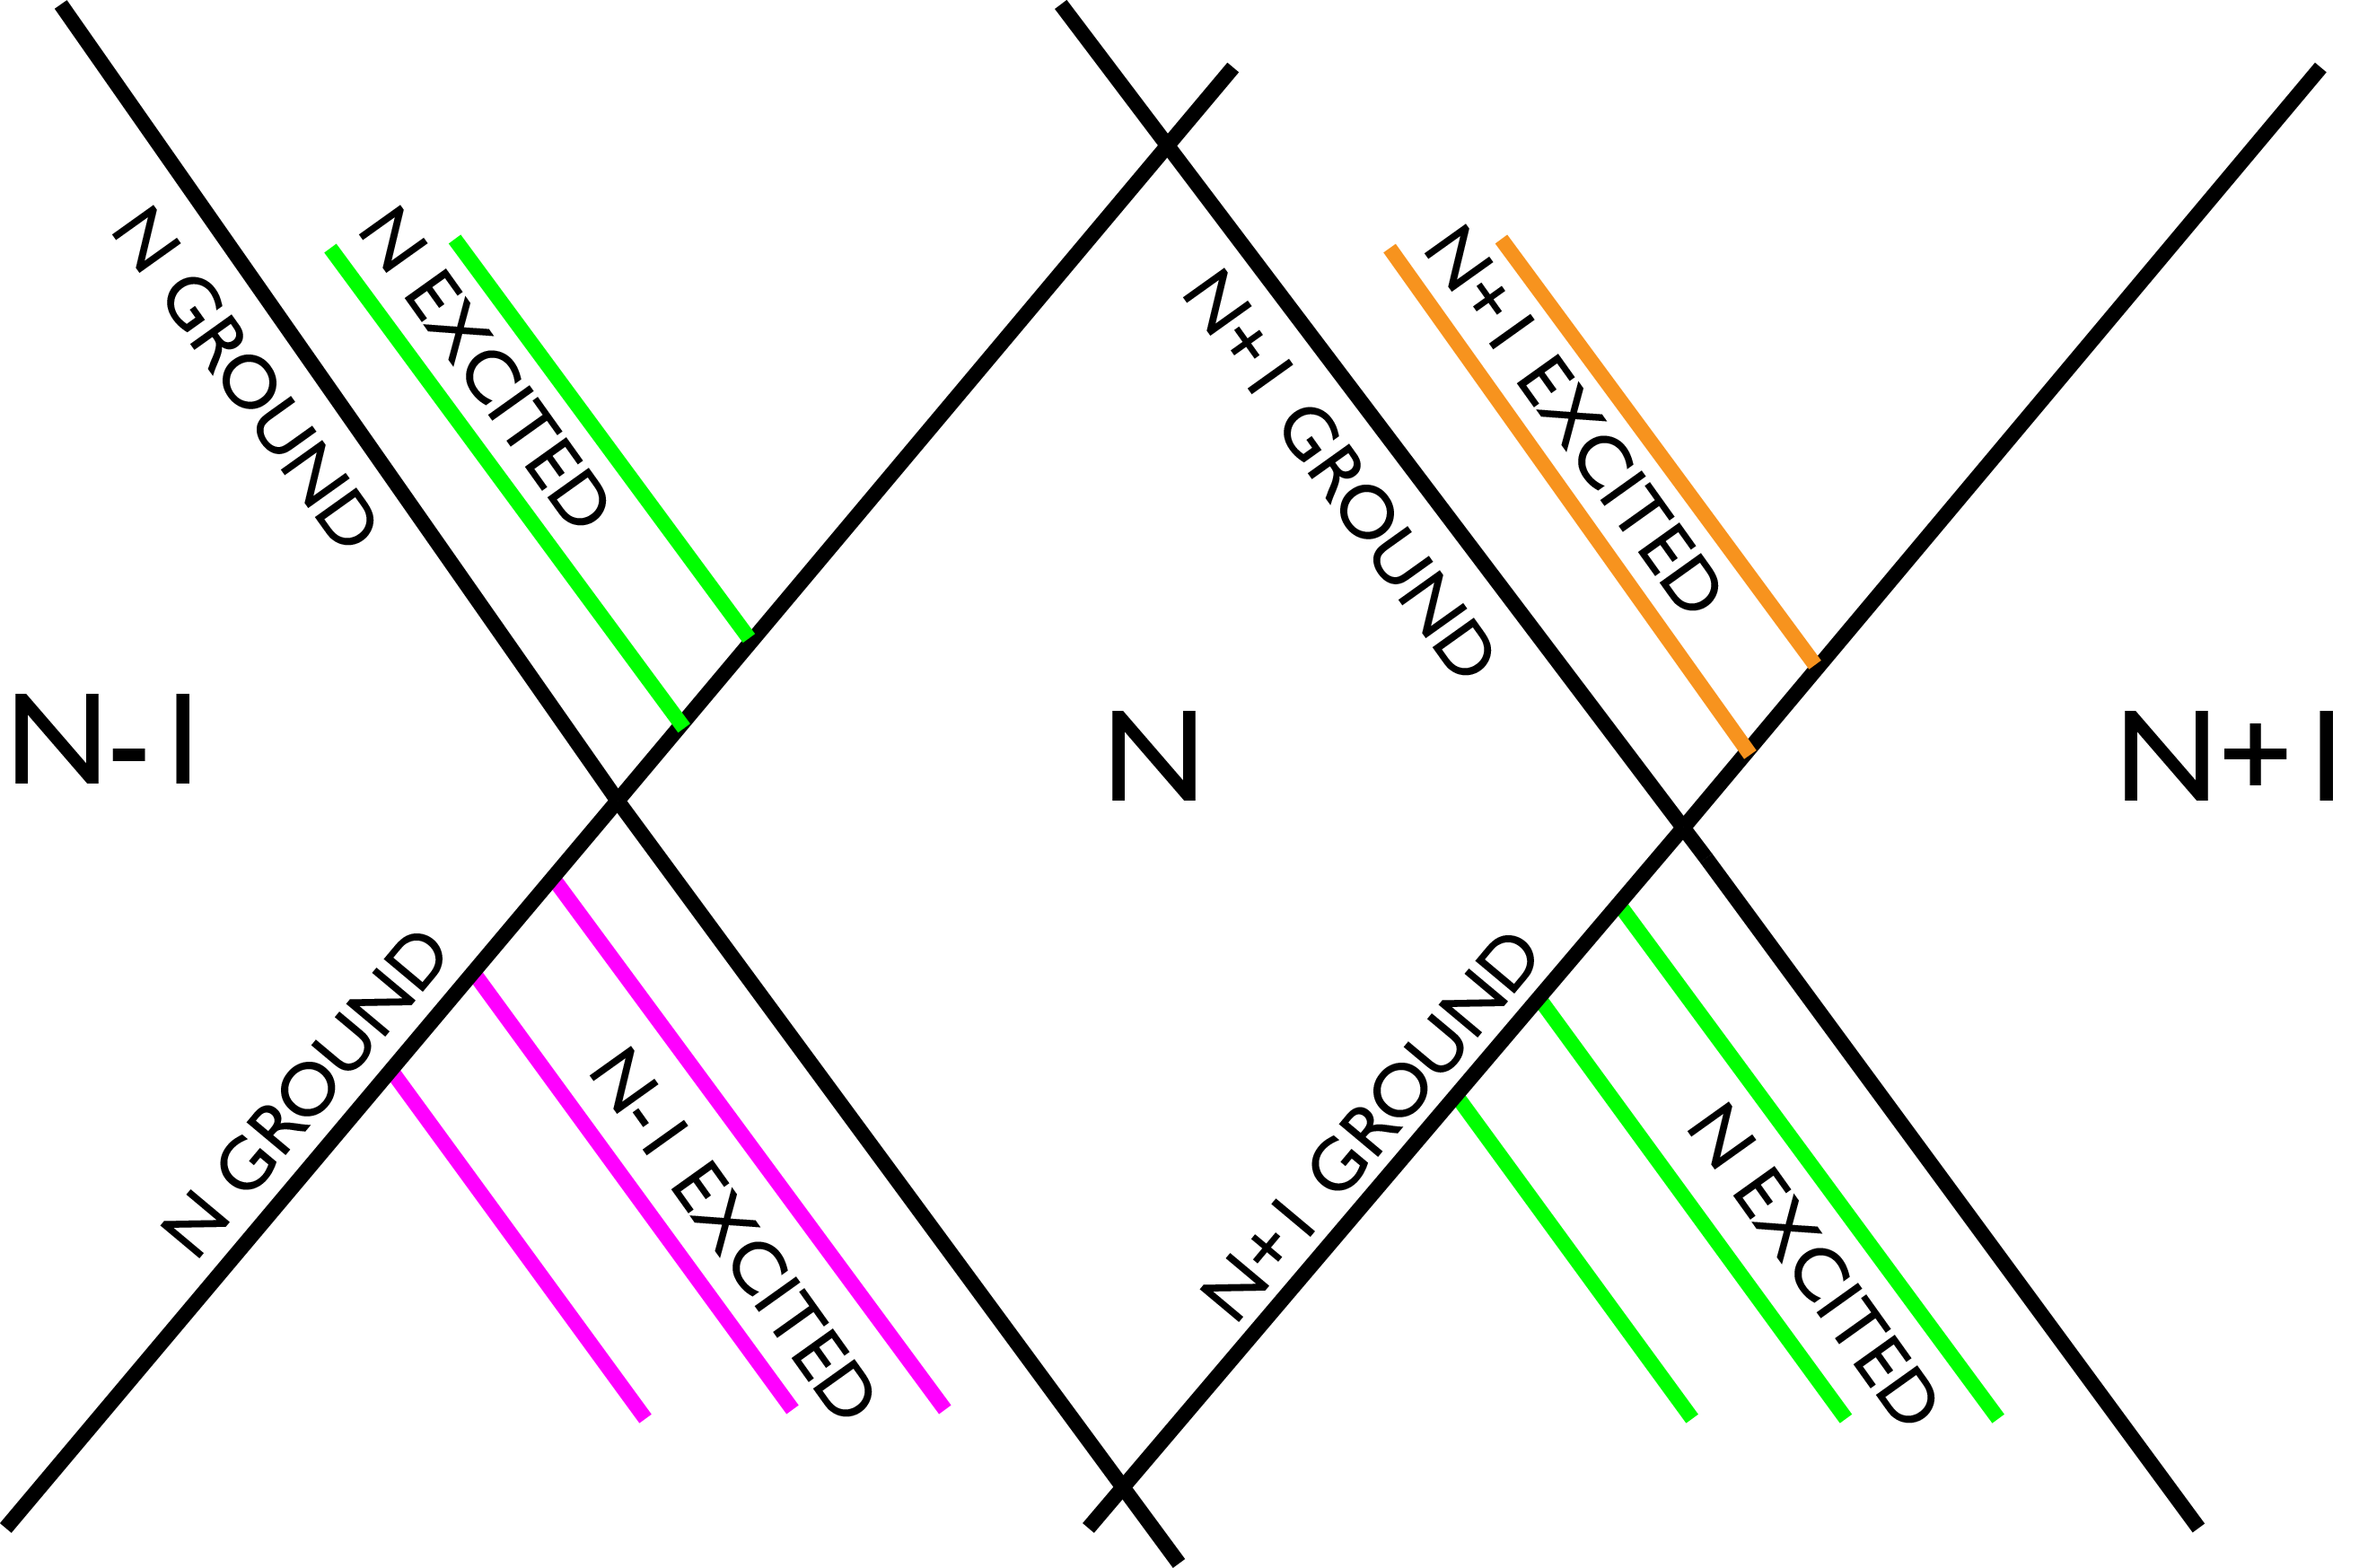

In [80]:
Image(filename=os.path.join(working_dir,'figures/level_diagram.png'), width=400)

And a diagram of what those levels look like on the quantum dot with spin dependent tunnel barriers.

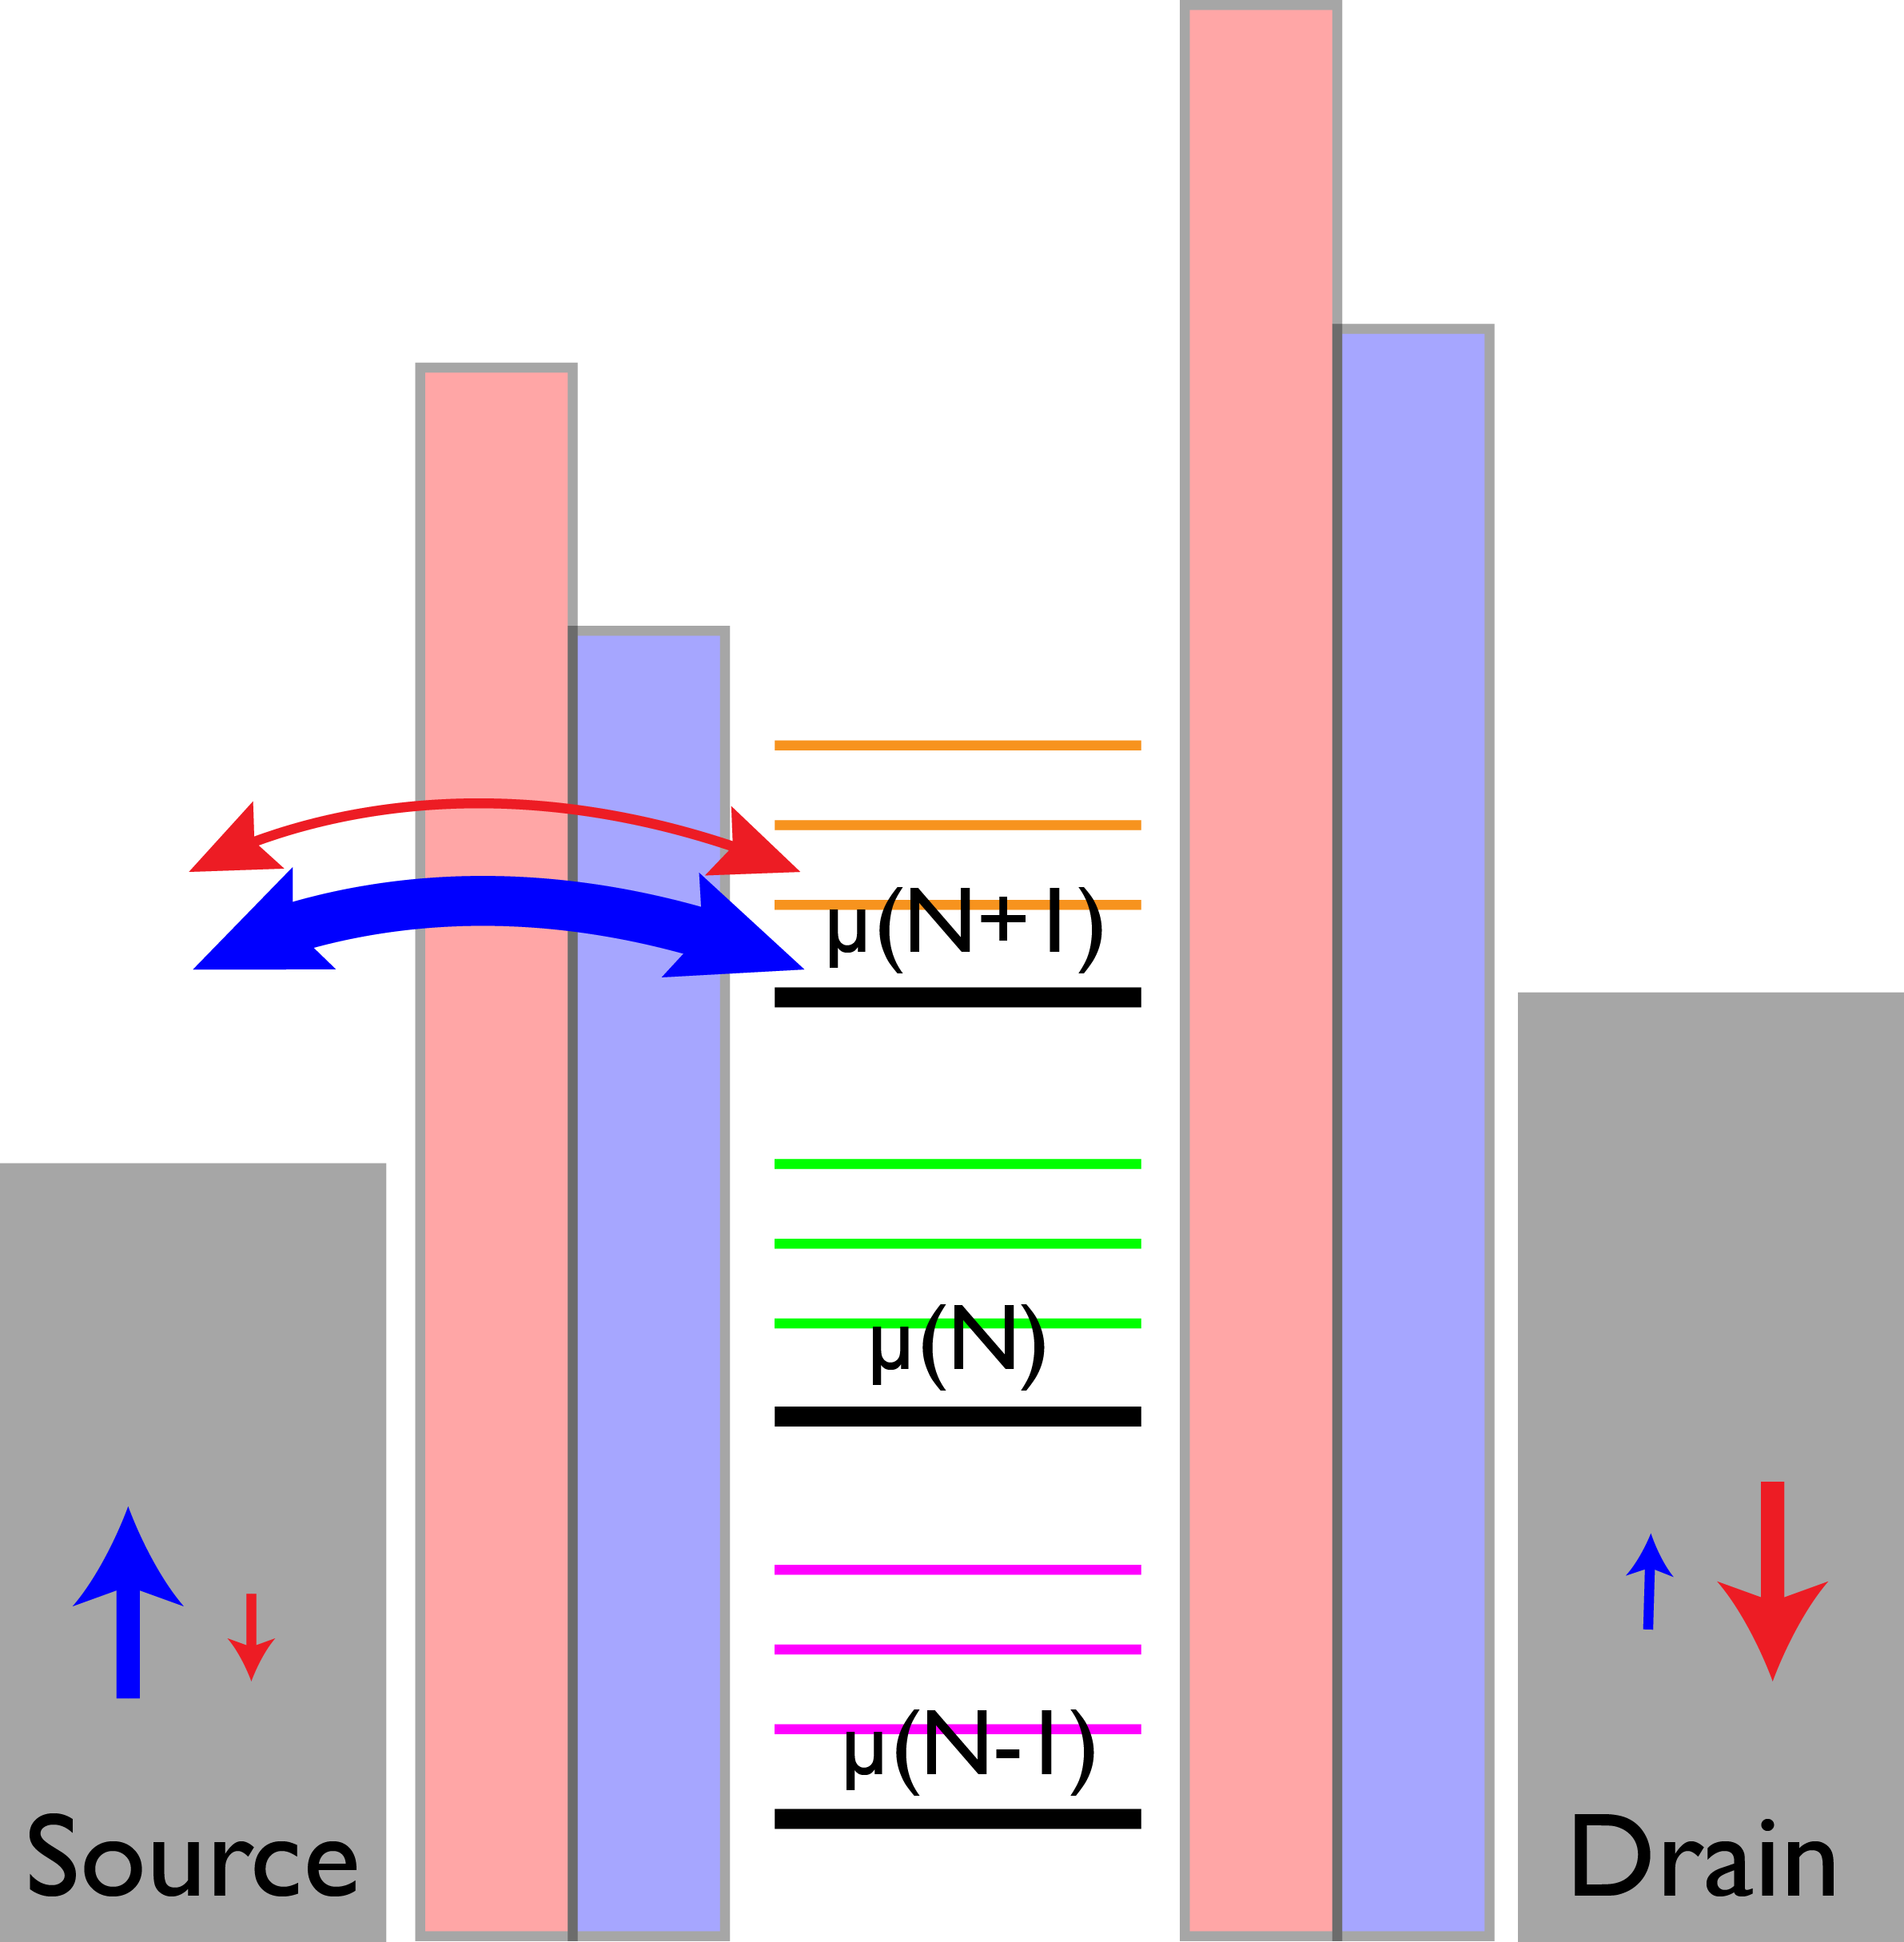

In [82]:
Image(filename=os.path.join(working_dir,'figures/fm_dot_levels.png'), width=400)

Some explaination of the above diagram:

